In [1]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

import numpy as np
import matplotlib.pyplot as plt
from preprocessing import train_test_split, load_mnist

# Adjust this path to match your folder structure
data_path = os.path.join(parent_dir, 'data', 'mnist')

# Load all training data
X_all, y_all = load_mnist(data_path, kind='train')


print(f"All data shape: {X_all.shape}")
print(f"All labels shape: {y_all.shape}")

# Split the data into new training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, seed=2108)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Labels path: /Users/nathan/Desktop/Perceptron/data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte
Images path: /Users/nathan/Desktop/Perceptron/data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte
All data shape: (60000, 784)
All labels shape: (60000,)
Training data shape: (48000, 784)
Test data shape: (12000, 784)


In [2]:
from mlp import MLP
import numpy as np

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, seed=2108)

def one_hot_encode(y, num_classes):
    encoded = np.zeros((num_classes, y.shape[0]))
    encoded[y, np.arange(y.shape[0])] = 1
    return encoded

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9

# Ensure X_train and X_val are in the correct shape (features, samples) and normalized
X_train = X_train.T.astype(np.float32) / 255
X_val = X_val.T.astype(np.float32) / 255

# One-hot encode the labels
y_train_onehot = one_hot_encode(y_train, num_classes)
y_val_onehot = one_hot_encode(y_val, num_classes)

# Debugging, checking if data is normalised correctly...
print(f"X_train min: {X_train.min()}, max: {X_train.max()}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_train_onehot sample: {y_train_onehot[:, 0]}")
print(f"Corresponding label: {np.argmax(y_train_onehot[:, 0])}")

# Now initialize and train the MLP
mlp = MLP(input_size=input_size, num_classes=num_classes)  # Input layer, two hidden layers, output layer
mlp.train(X_train, y_train_onehot, X_val, y_val_onehot, epochs=50)

X_train min: 0.0, max: 1.0
X_train shape: (784, 43200)
y_train shape: (43200,)
X_val shape: (784, 4800)
y_val shape: (4800,)
y_train_onehot sample: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Corresponding label: 4
Epoch 1/50, Training Accuracy: 0.7780, Validation Accuracy: 0.7746
Epoch 2/50, Training Accuracy: 0.8836, Validation Accuracy: 0.8825
Epoch 3/50, Training Accuracy: 0.9025, Validation Accuracy: 0.9019
Epoch 4/50, Training Accuracy: 0.9112, Validation Accuracy: 0.9131
Epoch 5/50, Training Accuracy: 0.9188, Validation Accuracy: 0.9173
Epoch 6/50, Training Accuracy: 0.9241, Validation Accuracy: 0.9204
Epoch 7/50, Training Accuracy: 0.9300, Validation Accuracy: 0.9279
Epoch 8/50, Training Accuracy: 0.9331, Validation Accuracy: 0.9304
Epoch 9/50, Training Accuracy: 0.9380, Validation Accuracy: 0.9331
Epoch 10/50, Training Accuracy: 0.9400, Validation Accuracy: 0.9350
Epoch 11/50, Training Accuracy: 0.9441, Validation Accuracy: 0.9381
Epoch 12/50, Training Accuracy: 0.9473, Validation Accurac

Test accuracy on new test set: 0.97175


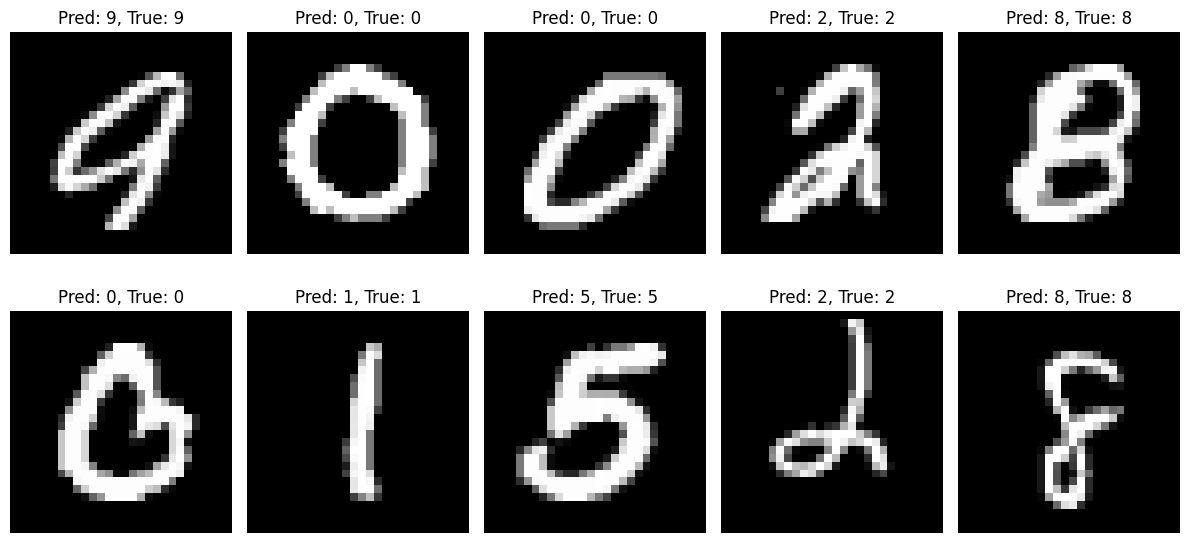

In [3]:
# Preprocess X_test
X_test = X_test.T.astype(np.float32) / 255  # Transpose to (features, samples) and normalize

# One-hot encode y_test
y_test_onehot = one_hot_encode(y_test, num_classes)

# Evaluate on new test set
predictions = mlp.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy on new test set: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.T[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
from cross_validation import cross_validate, print_cv_results

# Perform cross-validation
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9

scores_mlp = cross_validate(MLP, X_all, y_all, n_splits=5, 
                            hidden_layers=[128, 64])


/Users/nathan/Desktop/Perceptron/src/mlp.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 1/200, Training Accuracy: 0.8444, Validation Accuracy: 0.8444
Epoch 2/200, Training Accuracy: 0.8456, Validation Accuracy: 0.8441
Epoch 3/200, Training Accuracy: 0.8500, Validation Accuracy: 0.8510
Epoch 4/200, Training Accuracy: 0.8326, Validation Accuracy: 0.8287
Epoch 5/200, Training Accuracy: 0.8496, Validation Accuracy: 0.8488
Epoch 6/200, Training Accuracy: 0.8483, Validation Accuracy: 0.8502
Epoch 7/200, Training Accuracy: 0.8461, Validation Accuracy: 0.8503
Epoch 8/200, Training Accuracy: 0.8304, Validation Accuracy: 0.8369
Epoch 9/200, Training Accuracy: 0.8523, Validation Accuracy: 0.8552
Epoch 10/200, Training Accuracy: 0.8556, Validation Accuracy: 0.8551
Epoch 11/200, Training Accuracy: 0.8463, Validation Accuracy: 0.8498
Epoch 12/200, Training Accuracy: 0.8360, Validation Accuracy: 0.8364
Epoch 13/200, Training Accuracy: 0.8573, Validation Accuracy: 0.8560
Epoch 14/200, Training Accuracy: 0.8464, Validation Accuracy: 0.8433
Epoch 15/200, Training Accuracy: 0.8466, Va

In [5]:
print_cv_results(scores_mlp)


Cross-validation results:
Scores: [0.9028333333333334, 0.9191666666666667, 0.9164166666666667, 0.9175833333333333, 0.92175]
Mean score: 0.9155
Standard deviation: 0.0066
